# Heart Disease Prediction
**Auther:** [Muhammad Usman](https://github.com/Usmana4360)\
**Date:** 4 Jan 2024\
**Dataset:** Heart Disease UCI

## Meta data

## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content
### Column Descriptions:
* **id** (Unique id for each patient)
* **age** (Age of the patient in years)
* **origin** (place of study)
* **sex** (Male/Female)
* **cp** chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* **trestbps** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* **chol** (serum cholesterol in mg/dl)
* **fbs** (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* **thalach:** maximum heart rate achieved
* **exang:** exercise-induced angina (True/ False)
* **oldpeak:** ST depression induced by exercise relative to rest
* **slope:** the slope of the peak exercise ST segment
* **ca:** number of major vessels (0-3) colored by fluoroscopy
* **thal:** [normal; fixed defect; reversible defect]
* **num:** the predicted attribute
Acknowledgements
## Creators:
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [539]:
# Import Liberaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer,KNNImputer

# Machine learning
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# import warnings
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [540]:
# Laod data by local pc
df=pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## EDA
### Explore Each columns

In [541]:
# Exploring data of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [542]:
# check data shape
df.shape

(920, 16)

In [543]:
# Id colum
df['id'].min(),df['id'].max()

(1, 920)

In [544]:
df['age'].min(),df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

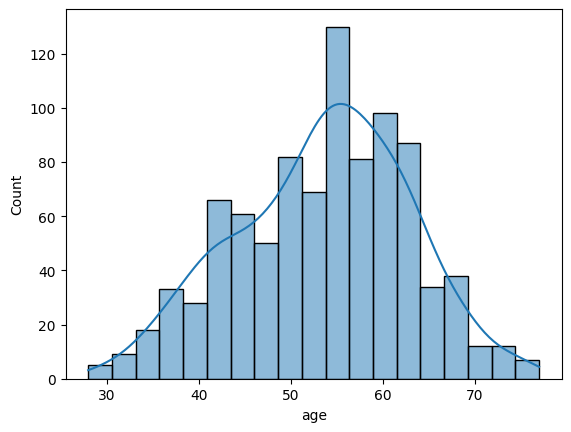

In [545]:
# Draw a histogram
sns.histplot(df['age'],kde=True)

In [546]:
# Lets explore gender base distribution

# plot age colum using plotly and coloring by gender

fig=px.histogram(data_frame=df,x='age',color='sex')
fig

In [547]:
# find the values of sex colums
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [548]:
# calculate the percentage of male and female
male=726
female=194
total=male+female

Male_per=(male/total)*100
female_per=(female/total)*100

print(f"male persentage in data: {Male_per:.2f}%")
print(f"female percentage: {female_per:.2f}%")

male persentage in data: 78.91%
female percentage: 21.09%


In [549]:
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [550]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [551]:
# Fine unique values in data
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

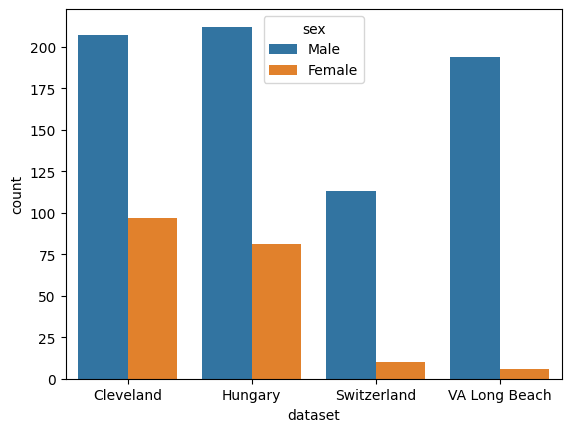

In [552]:
# we have to fine dataset colums
sns.countplot(data=df,x='dataset',hue='sex')

# make same plot using plotly
fig=px.bar(df,x='dataset',color='sex')
fig

In [553]:
# make a plot of age colum using plotly
fig=px.histogram(data_frame=df,x='age',color='dataset')
fig

In [554]:
# print median and mode and mean of dataset
print(df.groupby('dataset')['age'].mean())
print(df.groupby('dataset')['age'].median())
#print(df.groupby('dataset')['age'].mode()[0])

dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64


1. Write down abservation of dataset of mean median and mode

#### Lets explore cp column


In [555]:
# Value counts
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [556]:
# Draw the plot of age colum by gouped by cp colums using plotly
fig=px.histogram(data_frame=df,x='age',color='cp')
fig

<Axes: xlabel='cp', ylabel='count'>

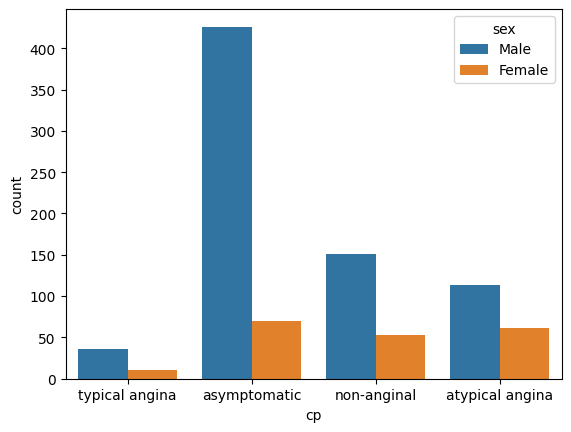

In [557]:
sns.countplot(df,x='cp',hue='sex')

<Axes: xlabel='cp', ylabel='count'>

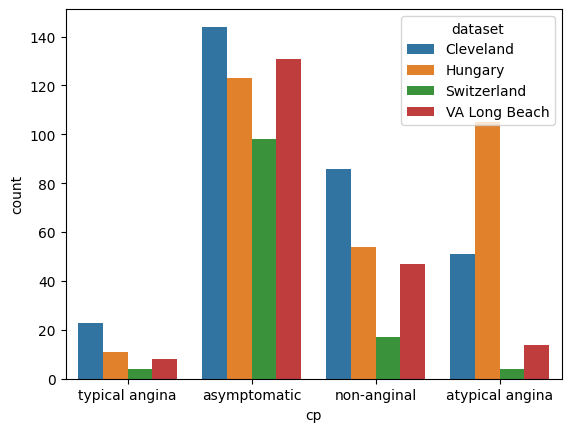

In [558]:
sns.countplot(df,x='cp',hue='dataset')

#### Lets explore the tresp colums
 The normal blood pressure is 120/80

In [559]:
# Find values counts
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [560]:
df['trestbps'].value_counts()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
164.0      1
101.0      1
174.0      1
192.0      1
127.0      1
Name: count, Length: 61, dtype: int64

<Axes: xlabel='trestbps', ylabel='Count'>

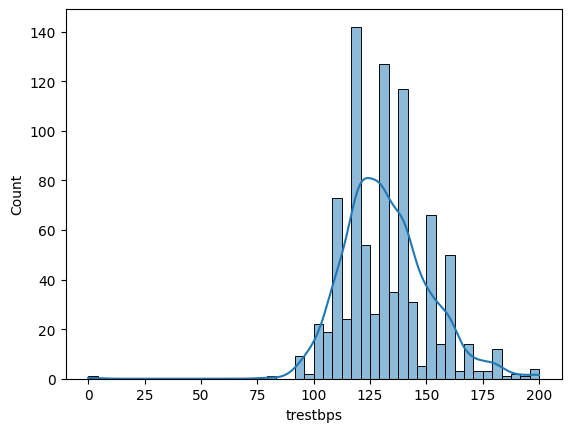

In [561]:
sns.histplot(df,x='trestbps',kde=True)


<span style="color:yellow; font-size:350%; bold;">Dealing with missing values</span>

In [562]:
# Deal with missing values
df['trestbps'].isnull().sum()/len(df)*100

6.41304347826087

In [563]:
imputer=SimpleImputer()
df['trestbps']=imputer.fit_transform(df[['trestbps']])

In [564]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [565]:
# We are going to make a fuction to deal with missing values
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [566]:
# Impute missing values using iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [567]:
print(df['thal'].value_counts())
##df['thal'].isnull().sum()/len(df['thal'])*100

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


In [568]:
# Lets Impute in thal colum by using ml  model
missing=df['thal'].isnull().sum()

In [569]:
print(f"missing: {missing}")

missing: 486


In [570]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [571]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [572]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [573]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)


ca         611
thal       486
slope      309
fbs         90
oldpeak     62
thalch      55
exang       55
chol        30
restecg      2
dtype: int64

In [574]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values chol : 3.26%


MAE = 44.67803370786517 

RMSE = 62.99154340870872 

R2 = 0.6856719455260545 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 67.39 accuracy

Missing Values thalch : 5.98%
MAE = 16.55364161849711 

RMSE = 21.52035925415154 

R2 = 0.32657637590861377 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 80.35 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5528372093023255 

RMSE = 0.7793947189370587 

R2 = 0.421274174233649 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 70.11 accuracy



In [575]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Dealing with outliers

## Output
1. The minimum age have a heart disease of 24
2. Max
3. Write down the observation of cp colums
4. We have highest number of peaple oin clevland
5. Lowest peoples in switzerland
6. The highest count of  females in this data set in clevland
7. Lowest in VA long beach
8. The highest number of males in hungery
9. Lowest males in switzerland

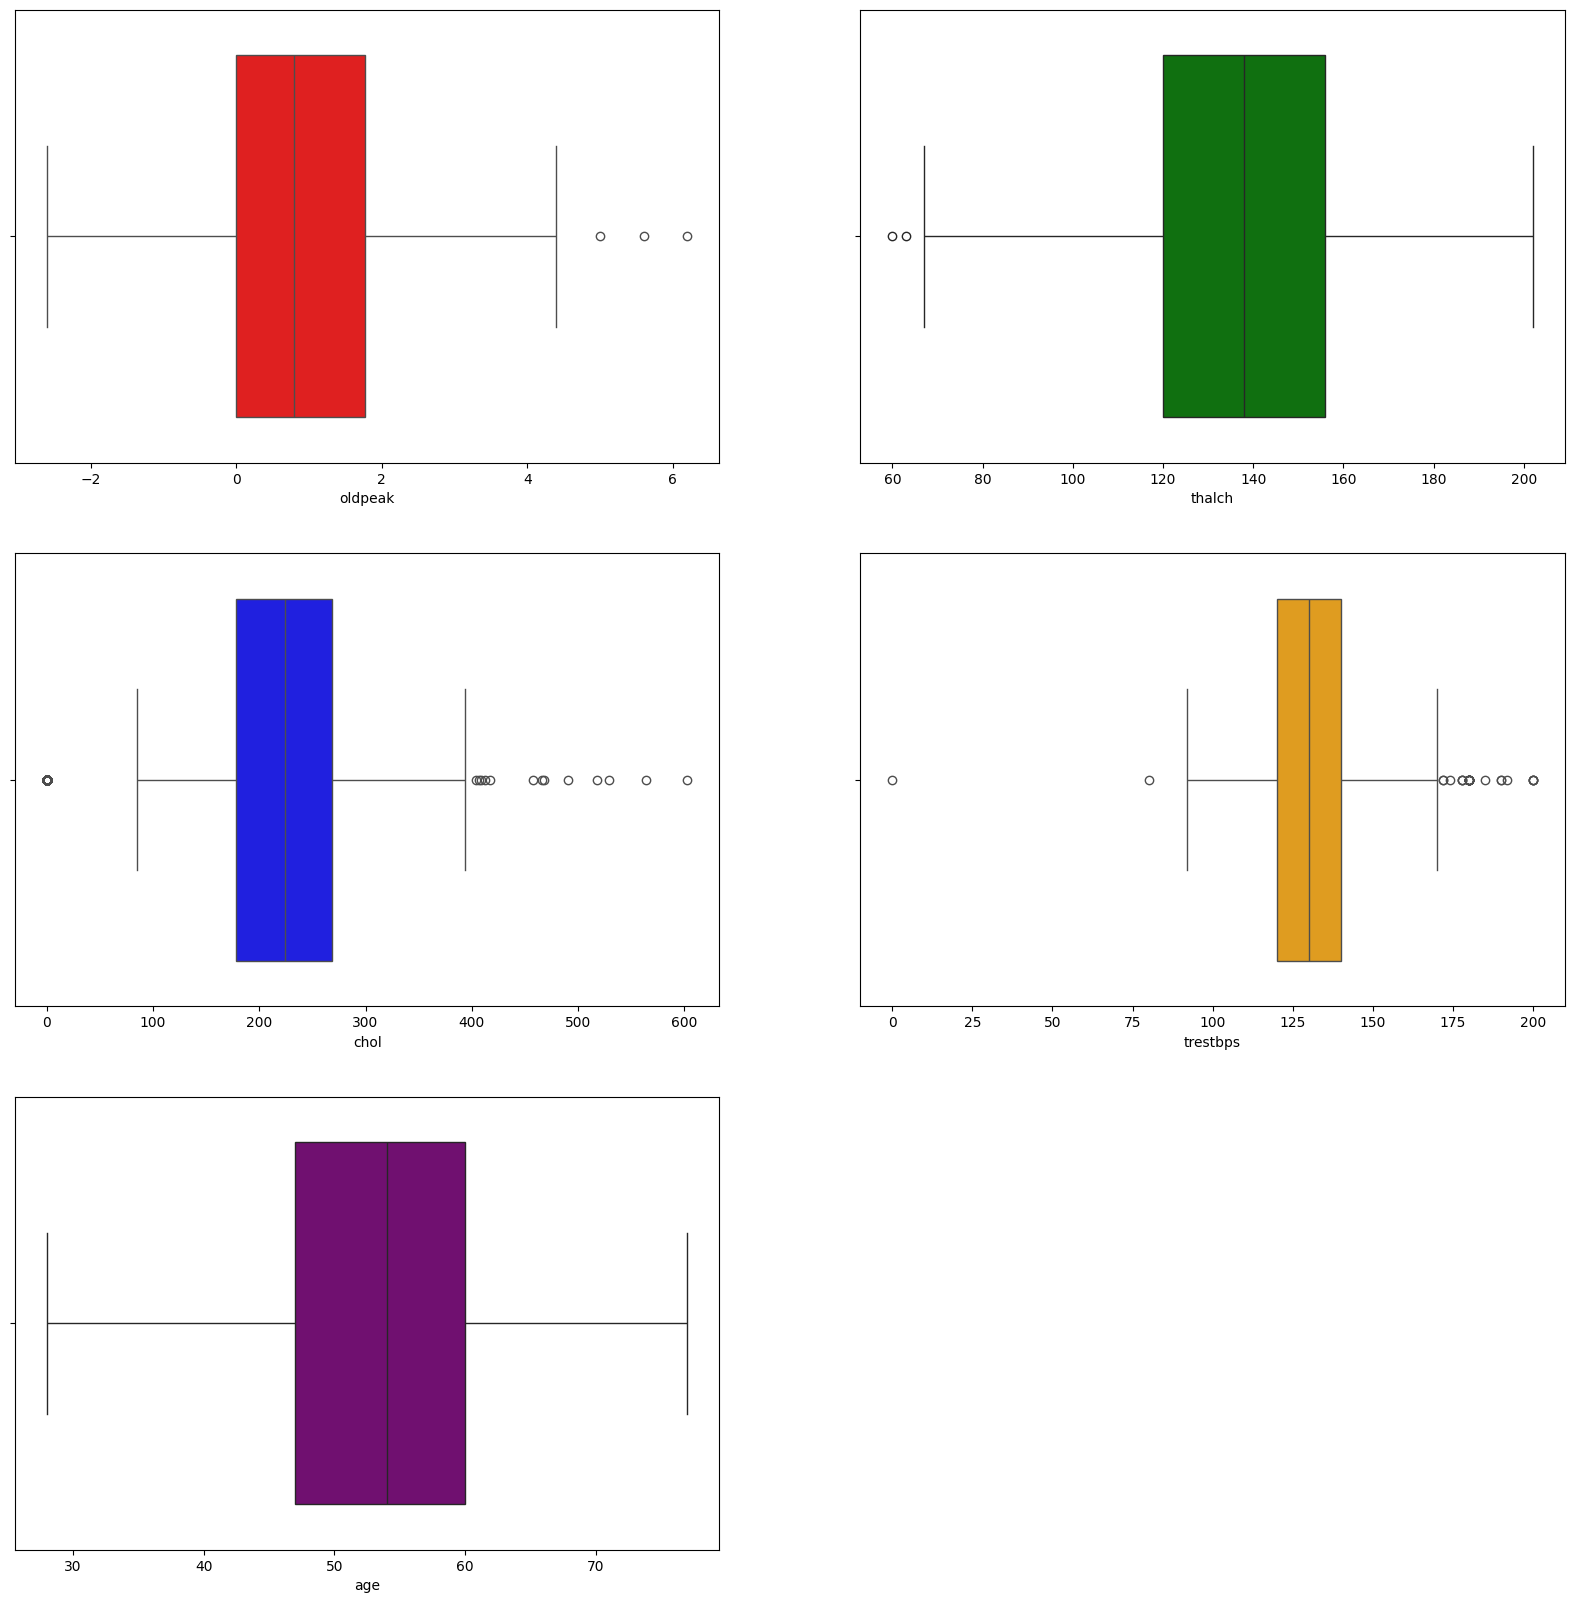

In [576]:
# Create box plot of numerical columns using for loop and subplot
plt.figure(figsize=(20,20))
colors=['red','green','blue','orange','purple']
for i,col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[col],color=colors[i])
plt.show()

In [577]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [578]:
# Create box plot using plotly
fig=px.box(data_frame=df,y='age')
fig


In [579]:
fig=px.box(data_frame=df,y='chol')
fig

In [580]:
numeric_cols

['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [581]:
fig=px.box(data_frame=df,y='oldpeak')
fig

In [582]:
fig=px.box(data_frame=df,y='thalch')
fig

In [583]:
fig=px.box(data_frame=df,y='chol')
fig

In [584]:
#Print row where restbps value is 0 
df[df['trestbps']==0]

# Remove this row
df=df[df['trestbps']!=0]

In [585]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Scale the Numerical columns

In [586]:
# Make a list of columns to scale
columns_to_scale=['age','trestbps','chol','thalch','oldpeak']
min_max_scale={}
for col in columns_to_scale:
    le=MinMaxScaler()
    df[col]=le.fit_transform(df[[col]])
    min_max_scale[col]=le

In [587]:
columns_to_encode = ['thal', 'ca', 'dataset','slope', 'exang', 'restecg','fbs', 'cp', 'sex','num']

# Dictionary to store LabelEncoders for each column
label_encoders = {}
# Loop to apply LabelEncoder to each column
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()

    # Fit and transform the data, then inverse transform it
    df[col] = le.fit_transform(df[col])

    # Store the encoder in the dictionary
    label_encoders[col] = le

In [588]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,0.714286,1,0,3,0.541667,0.386401,1,0,0.633803,0,0.556818,0,0,0,0
1,2,0.795918,1,0,0,0.666667,0.474295,0,0,0.338028,1,0.465909,1,3,1,2
2,3,0.795918,1,0,0,0.333333,0.379768,0,0,0.485915,1,0.590909,1,2,2,1
3,4,0.183673,1,0,2,0.416667,0.414594,0,1,0.894366,0,0.693182,0,0,1,0
4,5,0.265306,0,0,1,0.416667,0.338308,0,0,0.788732,0,0.454545,2,0,1,0


# Machine Learning

In [589]:
# Target column
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

Target colum is num We use this column to predict heart disease. Unique values of this column are [0,1,2,3,4]
1. `0 = no heart disease`
2. `1 = mild heart disease`
3. `2 = moderate heart disease`
4. `3 = severe heart disease`
5. `4 = critical heart disease`

In [590]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,0.714286,1,0,3,0.541667,0.386401,1,0,0.633803,0,0.556818,0,0,0,0
1,2,0.795918,1,0,0,0.666667,0.474295,0,0,0.338028,1,0.465909,1,3,1,2
2,3,0.795918,1,0,0,0.333333,0.379768,0,0,0.485915,1,0.590909,1,2,2,1
3,4,0.183673,1,0,2,0.416667,0.414594,0,1,0.894366,0,0.693182,0,0,1,0
4,5,0.265306,0,0,1,0.416667,0.338308,0,0,0.788732,0,0.454545,2,0,1,0


In [591]:
# split data into x and y 
x=df.drop(['num','id'],axis=1)
y=df['num']

# Splitt data into training and testing 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Enlist the models to use for predict heart disease, Models should be classifier and multiclass classification.
1. Logistic regression
2. KNN
3. SVM
4. Decision Tree Classifier
5. Random Forest classifier 
6. Gradiant boosting
7. XGboost
8. Adaboost
9. light GBM
10. NB

In [313]:
# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
# Import pipeline
from sklearn.pipeline import Pipeline

In [538]:
# Make a list of models to train and Evaluate
models=[('LogisticRegression',LogisticRegression(random_state=42)),
        ('KNeighborsClassifier',KNeighborsClassifier()),
        ('SVC',SVC(random_state=42)),
        ('DecisionTreeClassifier',DecisionTreeClassifier(random_state=42)),
        ('RandomForestClassifier',RandomForestClassifier(random_state=42)),
        ('GradientBoostingClassifier',GradientBoostingClassifier(random_state=42)),
        ('XGBClassifier',XGBClassifier()),
        ('GaussianNB',GaussianNB())]

Best_model=None
Best_accuracy=0.0

# Iterate the models and evaluate

for name, model in models:
    # Create a pipeline for each model
    pipeline=Pipeline([
        ('model',model)
    ])

    # Perform cross-validation
    score=cross_val_score(pipeline,x_train,y_train,cv=5)
    mean_score=score.mean()
    # Fit the pipline 
    pipeline.fit(x_train,y_train)
    # Predict value from pipline
    y_pred=pipeline.predict(x_test)

    # Evaluate
    accuracy=accuracy_score(y_pred,y_test)

    print('Model:  ', name)
    print('cross_val_score',mean_score)
    print('accuracy_score',accuracy)
    print()

    if accuracy>Best_accuracy:
        Best_accuracy=accuracy
        Best_model=model

print('Best_Model is:  ',Best_model)

Model:   LogisticRegression
cross_val_score 0.617687074829932
accuracy_score 0.5434782608695652

Model:   KNeighborsClassifier
cross_val_score 0.636734693877551
accuracy_score 0.5760869565217391

Model:   SVC
cross_val_score 0.617687074829932
accuracy_score 0.5760869565217391

Model:   DecisionTreeClassifier
cross_val_score 0.5755102040816327
accuracy_score 0.5652173913043478

Model:   RandomForestClassifier
cross_val_score 0.6394557823129252
accuracy_score 0.6304347826086957

Model:   GradientBoostingClassifier
cross_val_score 0.6340136054421769
accuracy_score 0.6086956521739131

Model:   XGBClassifier
cross_val_score 0.6353741496598639
accuracy_score 0.6141304347826086

Model:   GaussianNB
cross_val_score 0.5782312925170068
accuracy_score 0.5271739130434783

Best_Model is:   RandomForestClassifier(random_state=42)


In [593]:
# creating function to find best model:
def find_best_model(x, y, x_test, y_test):
    # Creating the global variables that we will use inside and the outside of the function as well:
    global y_pred,best_model_name
    np.random.seed(42)
    models = {
        'LogisticRegression': (LogisticRegression(random_state=42), {}),
        'SVC': (SVC(random_state=42), {'kernel': ['rbf', 'poly', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}),
        'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),
        'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
        'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),
        'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'n_estimators': [10, 100, 1000]}),
        'XGBClassifier': (XGBClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'learning_rate': [0.1, 0.01, 0.001]}),
        'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]}),
        'GaussianNB': (GaussianNB(), {}),
    }
    best_model_name = None
    best_accuracy = 0.0 

    for name, (model, params) in models.items():
        try:
            grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
            grid_search.fit(x, y)

            # You need to evaluate the model on the test set to get accuracy
            y_pred = grid_search.best_estimator_.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Print the performance metrics
            print("Model:", name)
            print("Cross-validation Accuracy:", grid_search.best_score_)
            print("Test Accuracy:", accuracy)
            print("\n_________________________________________________________________________________\n")

            # Check if the current model has the best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model_name = name
        except Exception as e:
            print(f"Error for model {name}: {e}")

    # Retrieve the best model
    print("Best Model:", best_model_name)
    print('Test Accuracy of the Best Model:', (best_accuracy)*100)


In [594]:
find_best_model(x, y, x_test, y_test)

Model: LogisticRegression
Cross-validation Accuracy: 0.5188821572820147
Test Accuracy: 0.5760869565217391

_________________________________________________________________________________

Model: SVC
Cross-validation Accuracy: 0.5635305298170586
Test Accuracy: 0.5217391304347826

_________________________________________________________________________________

Model: DecisionTreeClassifier
Cross-validation Accuracy: 0.4992100261344737
Test Accuracy: 0.6793478260869565

_________________________________________________________________________________

Model: RandomForestClassifier
Cross-validation Accuracy: 0.5504573532905679
Test Accuracy: 0.6847826086956522

_________________________________________________________________________________

Model: KNeighborsClassifier
Cross-validation Accuracy: 0.5668389166072701
Test Accuracy: 1.0

_________________________________________________________________________________

Model: GradientBoostingClassifier
Cross-validation Accuracy: 0.5036647

In [362]:
import pickle
pickle.dump(Best_model, open('Heart_disease_predicter.pkl','wb'))